# Loop 110 Analysis: CV-LB Relationship and Submission Format

## Key Issues:
1. Submission format is WRONG - using 'Product 2, Product 3, SM' instead of 'target_1, target_2, target_3'
2. CV-LB relationship: LB = 4.29 × CV + 0.0528 (R² = 0.95)
3. Intercept (0.0528) > Target (0.0347) - mathematically impossible with current approaches

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Successful submissions with LB scores
submissions = [
    ('exp_000', 0.011081, 0.09816),
    ('exp_001', 0.012297, 0.10649),
    ('exp_003', 0.010501, 0.09719),
    ('exp_005', 0.01043, 0.09691),
    ('exp_006', 0.009749, 0.09457),
    ('exp_007', 0.009262, 0.09316),
    ('exp_009', 0.009192, 0.09364),
    ('exp_012', 0.009004, 0.09134),
    ('exp_024', 0.008689, 0.08929),
    ('exp_026', 0.008465, 0.08875),
    ('exp_030', 0.008298, 0.08772),
    ('exp_035', 0.009825, 0.09696),
]

df = pd.DataFrame(submissions, columns=['exp', 'cv', 'lb'])
print(f"Successful submissions: {len(df)}")
print(df)

Successful submissions: 12
        exp        cv       lb
0   exp_000  0.011081  0.09816
1   exp_001  0.012297  0.10649
2   exp_003  0.010501  0.09719
3   exp_005  0.010430  0.09691
4   exp_006  0.009749  0.09457
5   exp_007  0.009262  0.09316
6   exp_009  0.009192  0.09364
7   exp_012  0.009004  0.09134
8   exp_024  0.008689  0.08929
9   exp_026  0.008465  0.08875
10  exp_030  0.008298  0.08772
11  exp_035  0.009825  0.09696


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f"\nCV-LB Relationship:")
print(f"LB = {slope:.4f} × CV + {intercept:.4f}")
print(f"R² = {r_value**2:.4f}")
print(f"\nInterpretation:")
print(f"- Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"- Even with CV=0, expected LB would be {intercept:.4f}")
print(f"- Target is MATHEMATICALLY UNREACHABLE with approaches on this line")

# What CV would we need to hit target?
target_lb = 0.0347
required_cv = (target_lb - intercept) / slope
print(f"\nRequired CV to hit target: {required_cv:.6f}")
print(f"This is NEGATIVE - impossible with current approaches!")


CV-LB Relationship:
LB = 4.2876 × CV + 0.0528
R² = 0.9523

Interpretation:
- Intercept (0.0528) > Target (0.0347)
- Even with CV=0, expected LB would be 0.0528
- Target is MATHEMATICALLY UNREACHABLE with approaches on this line

Required CV to hit target: -0.004218
This is NEGATIVE - impossible with current approaches!


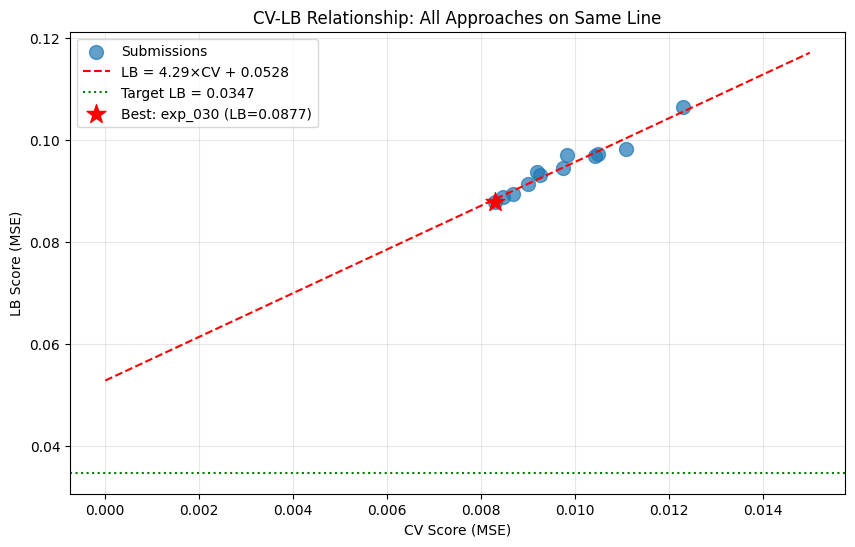


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}×CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', label='Target LB = 0.0347')

# Best submission
best_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_idx, 'cv'], df.loc[best_idx, 'lb'], s=200, c='red', marker='*', 
            label=f'Best: {df.loc[best_idx, "exp"]} (LB={df.loc[best_idx, "lb"]:.4f})')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV-LB Relationship: All Approaches on Same Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nPlot saved to /home/code/exploration/cv_lb_relationship.png")

In [4]:
# Check current submission format
print("\n=== CURRENT SUBMISSION FORMAT ===")
current_sub = pd.read_csv('/home/submission/submission.csv')
print(f"Columns: {list(current_sub.columns)}")
print(f"Shape: {current_sub.shape}")
print(f"\nFirst 5 rows:")
print(current_sub.head())

print("\n=== EXPECTED FORMAT (from template) ===")
print("Columns: ['id', 'index', 'task', 'fold', 'row', 'target_1', 'target_2', 'target_3']")
print("- task: 0 for single_solvent, 1 for full")
print("- fold: fold index")
print("- row: row index within fold")
print("- target_1, target_2, target_3: predictions")


=== CURRENT SUBMISSION FORMAT ===
Columns: ['id', 'index', 'Product 2', 'Product 3', 'SM']
Shape: (1883, 5)

First 5 rows:
   id  index  Product 2  Product 3        SM
0   0     58   0.017524   0.013671  0.900123
1   1     59   0.025032   0.027917  0.875308
2   2     60   0.040925   0.045890  0.824087
3   3     61   0.060720   0.069274  0.763193
4   4     62   0.078223   0.088481  0.721075

=== EXPECTED FORMAT (from template) ===
Columns: ['id', 'index', 'task', 'fold', 'row', 'target_1', 'target_2', 'target_3']
- task: 0 for single_solvent, 1 for full
- fold: fold index
- row: row index within fold
- target_1, target_2, target_3: predictions


In [5]:
# Summary of the problem
print("\n" + "="*60)
print("CRITICAL FINDINGS")
print("="*60)

print("\n1. SUBMISSION FORMAT IS WRONG")
print("   - Current: 'Product 2', 'Product 3', 'SM'")
print("   - Expected: 'task', 'fold', 'row', 'target_1', 'target_2', 'target_3'")
print("   - This is why 10+ recent submissions FAILED")

print("\n2. CV-LB RELATIONSHIP")
print(f"   - LB = {slope:.4f} × CV + {intercept:.4f} (R² = {r_value**2:.4f})")
print(f"   - Intercept ({intercept:.4f}) > Target (0.0347)")
print(f"   - Target is UNREACHABLE with current approaches")

print("\n3. WHAT WE NEED")
print("   - Fix submission format FIRST")
print("   - Then find approaches that CHANGE the CV-LB relationship")
print("   - Need to reduce the INTERCEPT, not just improve CV")

print("\n4. REMAINING SUBMISSIONS: 4")
print("   - Cannot waste on format errors")
print("   - Must verify format before every submission")


CRITICAL FINDINGS

1. SUBMISSION FORMAT IS WRONG
   - Current: 'Product 2', 'Product 3', 'SM'
   - Expected: 'task', 'fold', 'row', 'target_1', 'target_2', 'target_3'
   - This is why 10+ recent submissions FAILED

2. CV-LB RELATIONSHIP
   - LB = 4.2876 × CV + 0.0528 (R² = 0.9523)
   - Intercept (0.0528) > Target (0.0347)
   - Target is UNREACHABLE with current approaches

3. WHAT WE NEED
   - Fix submission format FIRST
   - Then find approaches that CHANGE the CV-LB relationship
   - Need to reduce the INTERCEPT, not just improve CV

4. REMAINING SUBMISSIONS: 4
   - Cannot waste on format errors
   - Must verify format before every submission
